# 0 - Overview and setup

In these notebooks we are going to present an introduction to machine learning. We are going start by demonstrating how to fit a line to a series of points, and finishing by identifying a collection of handwritten digits. This may not sound much like AI, but the foundational concepts we will go through can be extended to surprisingly complicated tasks. 

We will be using the [tensorflow](https://www.tensorflow.org/get_started/get_started) framework, which we will introduce later.

First, we are going to check that all the modules we require are within the environment. We are going to use Python 3 in all the notebooks, so please ensure that you have this installed. 

In [5]:
import tensorflow as tf
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
assert sys.version_info.major == 3

Now we are going to set the random seed. This will ensure that we can obtain reproducible results each time we run the notebook.

In [4]:
np.random.seed(0)

# 1 - Linear regression
### 1.1 - Introduction

Fundamentally what we are interested in is making predictions. Suppose I have a list of different houses and a description of each with their location, number of rooms, floorspace, etc, and I also have the corresponding price they were sold for. What I would like is to be able to give my machine learning system a new house description and have it accurately predict how much it sold for.

We can think of the description of the house as an input, and the price as the output. We then have {input, output} pairs which we can use to develop our system. This type of problem, where we have known outputs is called **supervised learning**, and when our outputs are real-valued numbers, we can use **linear regression** to build the system.

### 1.2 - Simple example

Suppose you are a physicist and you are collecting data from an experiment. Specifically, every hour you measure the temperature of a bar that is being slowly heated. 

We will record this as a series of $(x, y)$ pairs where $x \in [0 .. 19]$ is the hour after the experiment start, and $y$ is the temperature of the bar. We will artifically generate the datapoints below.

In [85]:
x_vals = np.arange(20).reshape(-1, 1) # This turns x into a column vector of shape 20x1.
y_true_vals = [5*x for x in x_vals] # Generate underlying values
y_noisy_vals = np.random.normal(y_true_vals, scale=3.0) # Add gaussian noise to each point

Now we will plot the data to check that it is sensible.

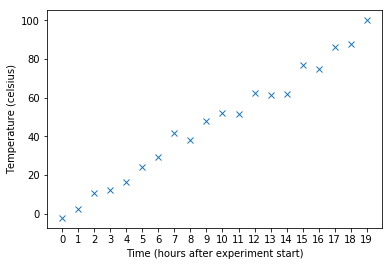

In [86]:
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(1, 1, 1)
ax_1.plot(x_vals, y_noisy_vals, 'x')
ax_1.set_xticks(x_vals)
ax_1.set_xlabel('Time (hours after experiment start)')
ax_1.set_ylabel('Temperature (celsius)')
display(fig_1)

Ok. This looks like it could be real data. There seems to be a general trend, and we can see that there were perhaps some mistakes made when taking the measurement. Now, let's fit a function to this data.

Our function is going to take the form:

$$\hat{y} = w_1 x$$

Which means that for an input $x$, we will predict some output $\hat{y}$, based on the value of $w_1$. We will call this our "predicting function".

N.B You may wonder why we are fitting _this_ function to the data. How do we know there's not a more complex function that might fit the data better? This is a valid point, and the most straightforward answer is that we tend to prefer simple equations to more complex ones. The reason for this is that simpler equations tend to be more _generalisable_ which we will talk about later in the notebook.

We need a way to measure how "good" our function is, and for that we define something called the **loss**. This is some measure of the difference between the _true_ data, and our _predicted_ values. We are going to measure the L2 loss which we will define as:

$$\mathcal{L}_2 = \sum_{i=0}^{n}(y_i - \hat{y}_i)^2$$

That is, for every input $x$, we take the squared difference between our prediction, $\hat{y}$, and the true value $y$, and sum these values. In code:

In [63]:
def L2loss(y_pred, y):
    return np.sum((y_pred-y)**2)

We want to minimise this loss. Let's pause for a moment, because we are going to introduce a very important concept: the loss function.

---

If we observe the equation above, we note that the L2 loss is itself a function! Specifically, it is parameterised by $w_1$. So we have a function $\mathcal{L}_2(w_1)$ that we are trying to minimise. We will call this the loss function.

Let's step through this with an example. We are going to select a range of different values for $w_1$ and observe the loss function evaluated at these values.

In [81]:
w1_values = np.linspace(0, 10, 19)

loss_function_values = [] # list to store 
for w1 in w1_values:
    y_pred = w1 * x_vals # this is our predicting equation from above
    loss_function_values.append(L2loss(y_pred, y_noisy_vals))
    print("w1: {:.2f}, Loss function: {:.2f}".format(w1, L2loss(y_pred, y_noisy_vals)))

w1: 0.00, Loss function: 60703.84
w1: 0.56, Loss function: 47873.13
w1: 1.11, Loss function: 36567.12
w1: 1.67, Loss function: 26785.79
w1: 2.22, Loss function: 18529.16
w1: 2.78, Loss function: 11797.22
w1: 3.33, Loss function: 6589.97
w1: 3.89, Loss function: 2907.41
w1: 4.44, Loss function: 749.54
w1: 5.00, Loss function: 116.37
w1: 5.56, Loss function: 1007.88
w1: 6.11, Loss function: 3424.09
w1: 6.67, Loss function: 7364.98
w1: 7.22, Loss function: 12830.57
w1: 7.78, Loss function: 19820.85
w1: 8.33, Loss function: 28335.83
w1: 8.89, Loss function: 38375.49
w1: 9.44, Loss function: 49939.84
w1: 10.00, Loss function: 63028.89


Now let's plot the values of the loss function, for the different values of $w_1$.

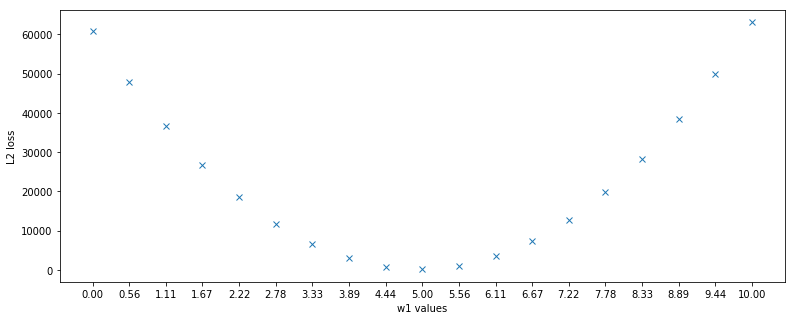

In [88]:
fig_2 = plt.figure(figsize=(13,5))
ax = fig_2.add_subplot(1, 1, 1)
ax.plot(w1_values, loss_function_values, 'x')
ax.set_xticks(w1_values)
ax.set_xlabel("w1 values")
ax.set_ylabel("L2 loss")
display(fig_2)

And select the minimum value for $w_1$:

In [89]:
lowest_index = (np.argmin(a_values_costs))
print("Value of w1 where loss is minimised: {}".format(w1_values[lowest_index]))

Value of w1 where loss is minimised: 5.0


Great! We now have our predicting function:

$$y = 5x$$

If we look at where we generated the artificial data, we indeed find that our underlying equation (before we added the noise) was $y = 5x$, and we have been able to learn this equation from the data. That's us right? Now we can conquer machine learning with our regression model!

Not quite. We were lucky that our range of $w1$ values happened to include the minimum. What if we'd only looked at values $\in [0, 3]$? We need a more robust technique. 

Before we present that, we want to introduce a few more simple concepts.

### 1.3 - Bias

### 1.4 - Multiple features